In [1]:

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt



from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report



import warnings

warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("/content/Churn_Modelling.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
data.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [5]:
data.head(3)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [6]:
data.drop(columns = ['RowNumber','CustomerId','Surname'],inplace = True)

In [7]:
corr_result = {}



for col in data.columns:

    if data[col].dtype != 'object' and col != 'Exited':

        correlation = data[col].corr(data['Exited'])

        corr_result[col] = correlation



corr_result

{'CreditScore': -0.027093539754657746,
 'Age': 0.28532303783506774,
 'Tenure': -0.014000612253444577,
 'Balance': 0.1185327687716338,
 'NumOfProducts': -0.04781986494944055,
 'HasCrCard': -0.0071377656030389165,
 'IsActiveMember': -0.15612827818890512,
 'EstimatedSalary': 0.012096861026844645}

In [8]:
le = LabelEncoder()

data['Geography'] = le.fit_transform(data['Geography'])

data['Gender'] = le.fit_transform(data['Gender'])

In [9]:
data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1


In [11]:
data['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


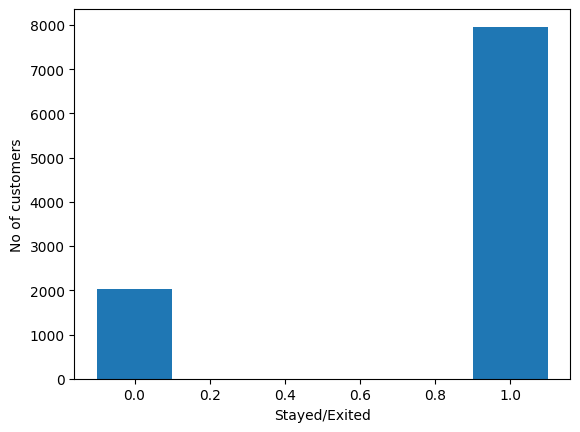

In [12]:
plt.bar(data['Exited'].unique(),data['Exited'].value_counts(),width = 0.2)

plt.xlabel('Stayed/Exited')

plt.ylabel('No of customers')

plt.show()

In [13]:

x_data = data.iloc[:,:-1].values

y_data = data.iloc[:,-1].values

In [14]:

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size = 0.3,random_state = 42, stratify = data['Exited'])

In [15]:
log_reg = LogisticRegression()

log_reg.fit(x_train,y_train)

LogisticRegression()

In [17]:
rfc = RandomForestClassifier(n_estimators=50)

rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [20]:
log_pred = log_reg.predict(x_train)

print("Accuracy Score: ",round(accuracy_score(y_train,log_pred),3))

print("\nClassification Report:\n",classification_report(y_train,log_pred))

Accuracy Score:  0.791

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      5574
           1       0.41      0.05      0.09      1426

    accuracy                           0.79      7000
   macro avg       0.60      0.52      0.49      7000
weighted avg       0.72      0.79      0.72      7000



In [21]:
rfc_pred = rfc.predict(x_train)

print("Accuracy Score: ",round(accuracy_score(y_train,rfc_pred),3))

print("\nClassification Report:\n",classification_report(y_train,rfc_pred))

Accuracy Score:  1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5574
           1       1.00      1.00      1.00      1426

    accuracy                           1.00      7000
   macro avg       1.00      1.00      1.00      7000
weighted avg       1.00      1.00      1.00      7000



In [22]:
gb = GradientBoostingClassifier(n_estimators=50,learning_rate=0.01)

gb.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.01, n_estimators=50)

In [23]:
gb_pred = gb.predict(x_train)

print("Accuracy Score: ",round(accuracy_score(y_train,gb_pred),3))

print("\nClassification Report:\n",classification_report(y_train,gb_pred))

Accuracy Score:  0.797

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      5574
           1       1.00      0.00      0.00      1426

    accuracy                           0.80      7000
   macro avg       0.90      0.50      0.45      7000
weighted avg       0.84      0.80      0.71      7000



In [24]:

model_result = {'Model':['Logistic Regression','Random Forest Classifier','Gradient Boosting Classifier'],'Accuracy':['79.6%','100%','79.7%']}

result_df = pd.DataFrame(model_result)

result_df

,Model,Accuracy
0,Logistic Regression,79.6%
1,Random Forest Classifier,100%
2,Gradient Boosting Classifier,79.7%


from matplotlib import pyplot as plt
import seaborn as sns
result_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
result_df.groupby('Accuracy').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Accuracy'].value_counts()
    for x_label, grp in result_df.groupby('Model')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Model')
_ = plt.ylabel('Accuracy')

In [25]:
test_pred = gb.predict(x_test)

print("Accuracy Score: ",round(accuracy_score(y_test,test_pred),3))

print("\nClassification Report:\n",classification_report(y_test,test_pred))

Accuracy Score:  0.797

Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      2389
           1       1.00      0.00      0.01       611

    accuracy                           0.80      3000
   macro avg       0.90      0.50      0.45      3000
weighted avg       0.84      0.80      0.71      3000

